## Bike Sharing Demand

### Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes. How well those variables describe the bike demands Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

### Business Goal

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

### Data Dictionary

day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

### Importing required libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

### Reading the data

In [2]:
# Loading the dataset

boom_bike = pd.read_csv('day.csv')

In [3]:
# Looking at first 5 rows of the dataframe

boom_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Looking at the number of rows and columns

boom_bike.shape

(730, 16)

In [5]:
# Checking all the columns as well as their data types

boom_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Looking at the statistics of the numerical features

boom_bike.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.995890,2.000339,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.690411,0.462641,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800


### Exploratory Data Analysis

In [7]:
# Accounting for any missing values in the dataset

boom_bike.isnull().mean()*100

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

**There are no null values in the dataset. Hence, there is no need for any data imputation.**

In [8]:
# Renaming columns for better understanding

boom_bike.rename(columns = {'dteday':'date','yr':'year', 'mnth':'month', 'weathersit':'weather_situation', 'temp':'temperature', 'hum':'humidity', 'cnt':'count'}, inplace = True)
boom_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instant            730 non-null    int64  
 1   date               730 non-null    object 
 2   season             730 non-null    int64  
 3   year               730 non-null    int64  
 4   month              730 non-null    int64  
 5   holiday            730 non-null    int64  
 6   weekday            730 non-null    int64  
 7   workingday         730 non-null    int64  
 8   weather_situation  730 non-null    int64  
 9   temperature        730 non-null    float64
 10  atemp              730 non-null    float64
 11  humidity           730 non-null    float64
 12  windspeed          730 non-null    float64
 13  casual             730 non-null    int64  
 14  registered         730 non-null    int64  
 15  count              730 non-null    int64  
dtypes: float64(4), int64(11), 

**Converting numerical variables such as season, year, month, weekday, weather_situation into categorical variables:**

In [9]:
boom_bike.columns

Index(['instant', 'date', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weather_situation', 'temperature', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [10]:
num_var = ['season', 'year', 'month', 'weekday', 'weather_situation']

for c in boom_bike[num_var]:
    print('\n' + c)
    print('-'*30)
    print(boom_bike[num_var][c].value_counts())


season
------------------------------
3    188
2    184
1    180
4    178
Name: season, dtype: int64

year
------------------------------
1    365
0    365
Name: year, dtype: int64

month
------------------------------
12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: month, dtype: int64

weekday
------------------------------
2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

weather_situation
------------------------------
1    463
2    246
3     21
Name: weather_situation, dtype: int64


**From the above, we have figured out all the possible integer values which we need to map to categorical values as per the data dictionary:**

In [11]:
boom_bike['season'] = boom_bike['season'].map({1: 'spring', 2: 'summer',3:'fall', 4:'winter'})
boom_bike['year'] = boom_bike['year'].map({0: '2018', 1: '2019'})
boom_bike['month'] = boom_bike['month'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
boom_bike['weekday']= boom_bike['weekday'].map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})
boom_bike['weather_situation'] = boom_bike['weather_situation'].map({1: 'Clear',2:'Mist + Cloudy',3:'Light Rain/Snow'})

In [12]:
boom_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instant            730 non-null    int64  
 1   date               730 non-null    object 
 2   season             730 non-null    object 
 3   year               730 non-null    object 
 4   month              730 non-null    object 
 5   holiday            730 non-null    int64  
 6   weekday            730 non-null    object 
 7   workingday         730 non-null    int64  
 8   weather_situation  730 non-null    object 
 9   temperature        730 non-null    float64
 10  atemp              730 non-null    float64
 11  humidity           730 non-null    float64
 12  windspeed          730 non-null    float64
 13  casual             730 non-null    int64  
 14  registered         730 non-null    int64  
 15  count              730 non-null    int64  
dtypes: float64(4), int64(6), o

In [13]:
num_var = ['season', 'year', 'month', 'weekday', 'weather_situation']

for c in boom_bike[num_var]:
    print("\n" + c)
    print('-'*40)
    print(boom_bike[num_var][c].value_counts())


season
----------------------------------------
fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

year
----------------------------------------
2019    365
2018    365
Name: year, dtype: int64

month
----------------------------------------
Jan     62
Dec     62
Oct     62
May     62
Mar     62
Aug     62
July    62
Apr     60
June    60
Sep     60
Nov     60
Feb     56
Name: month, dtype: int64

weekday
----------------------------------------
Mon    105
Tue    105
Fri    104
Wed    104
Thu    104
Sun    104
Sat    104
Name: weekday, dtype: int64

weather_situation
----------------------------------------
Clear              463
Mist + Cloudy      246
Light Rain/Snow     21
Name: weather_situation, dtype: int64


**Identifying if the features hold Discreet or Continuous Values:**

In [14]:
boom_bike.nunique().sort_values()

year                   2
holiday                2
workingday             2
weather_situation      3
season                 4
weekday                7
month                 12
temperature          498
humidity             594
casual               605
windspeed            649
registered           678
atemp                689
count                695
instant              730
date                 730
dtype: int64

**From the above operation:**

**Discreet Variables:**
1. year                   2
2. holiday                2
3. workingday             2
4. weather_situation      3
5. season                 4
6. weekday                7
7. month                 12

**Continuous Variables:**
1. temperature          498
2. humidity             594
3. casual               605
4. windspeed            649
5. registered           678
6. atemp                689
7. count                695
8. instant              730
9. date                 730

In [15]:
sns.set_palette('GnBu_d')
sns.set_style('whitegrid')

**Visualisng Numerical Variables viz-a-viz Count:**

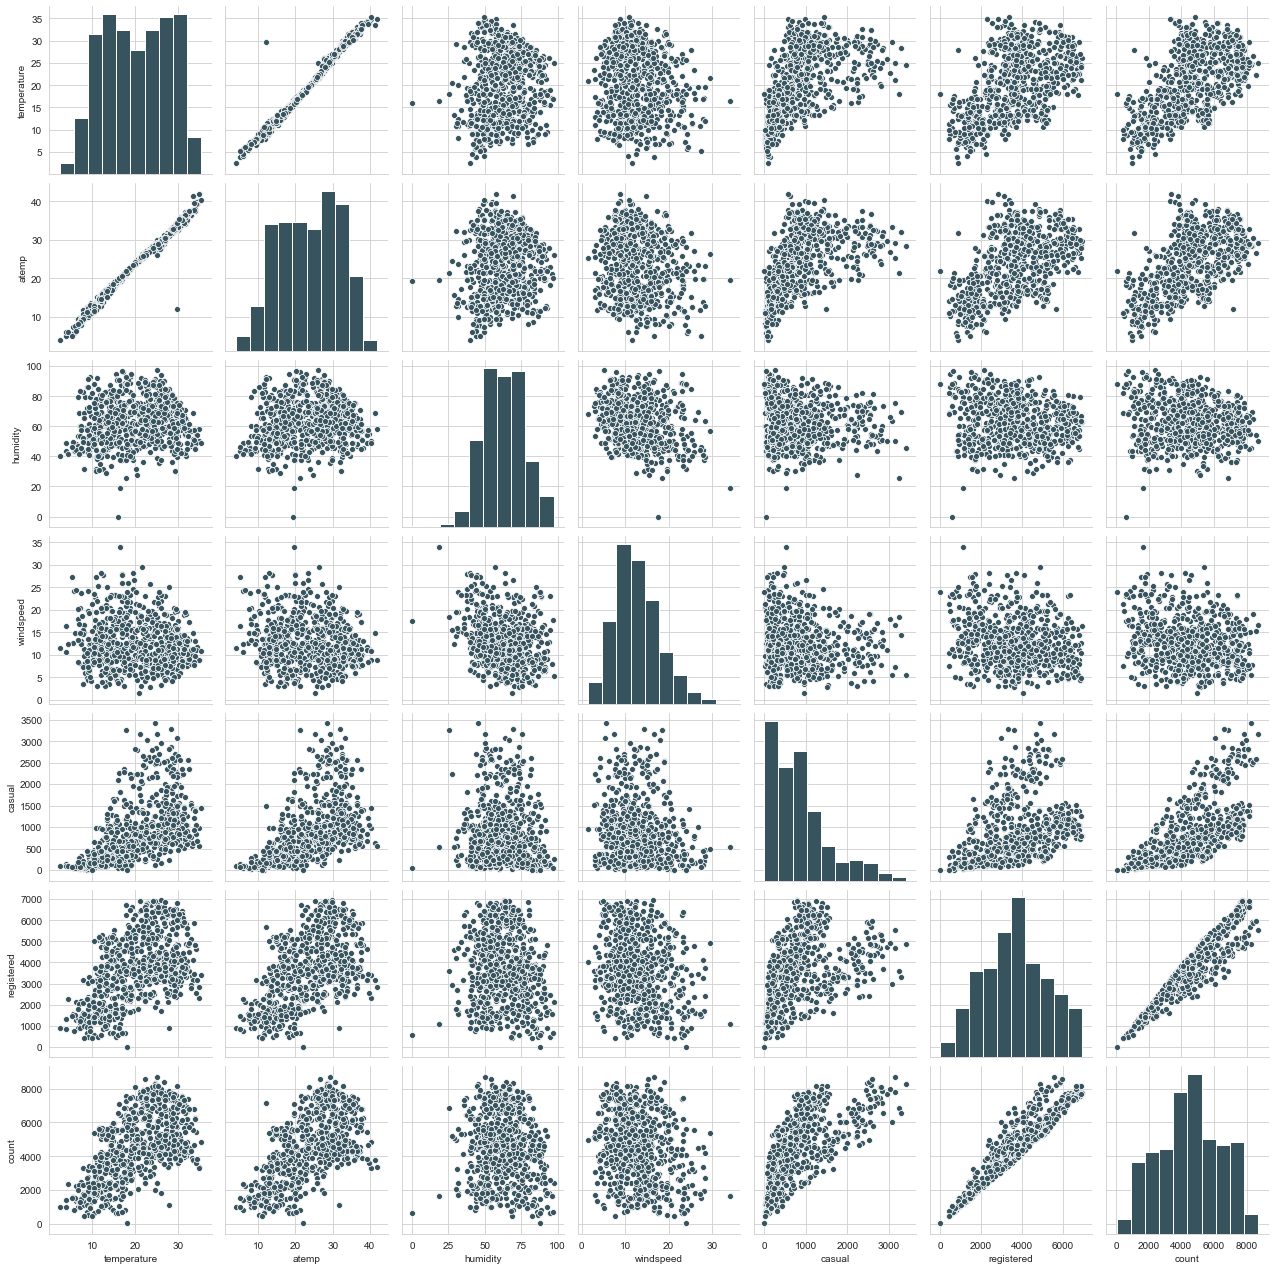

In [16]:
sns.pairplot(boom_bike, vars= ['temperature', 'atemp', 'humidity','windspeed', 'casual', 'registered', 'count'])
plt.show()

**From the above diagram we can see that Temperature and Atemp seems to have a positive correlation with count of bikes. On the other hand, humidity and windspeed seems to have a negative correlation. Since, casual and registered together make-up the count, we are bound to see highy positive correlation; more so for registered users.**

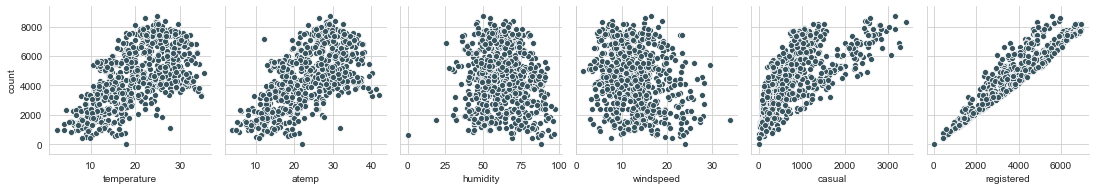

In [17]:
# Let's further deep dive

sns.pairplot(boom_bike, x_vars= ['temperature', 'atemp', 'humidity','windspeed', 'casual', 'registered'], y_vars =['count'], kind = 'scatter')
plt.show()

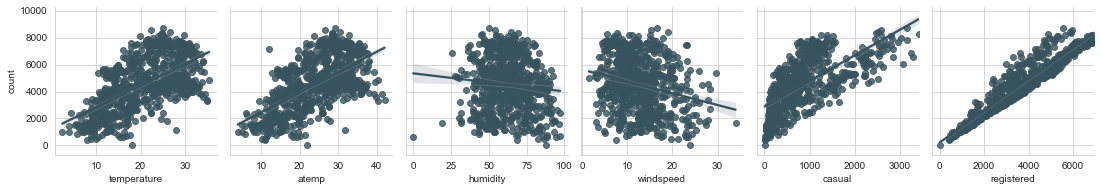

In [18]:
# Let's confirm our observation from the pairplot by also plotting a regression line.

sns.pairplot(boom_bike, x_vars= ['temperature', 'atemp', 'humidity','windspeed', 'casual', 'registered'], y_vars =['count'], kind = 'reg')
plt.show()

**With the help of regression lines, we can confirm that Temperature and Atemp seems to have a positive correlation with count of bikes. On the other hand, humidity and windspeed seems to have a negative correlation. Since, casual and registered together make-up the count, we are bound to see highy positive correlation; more so for registered users.**

**Visualisng Categorical Variables vis-a-vis Count:**

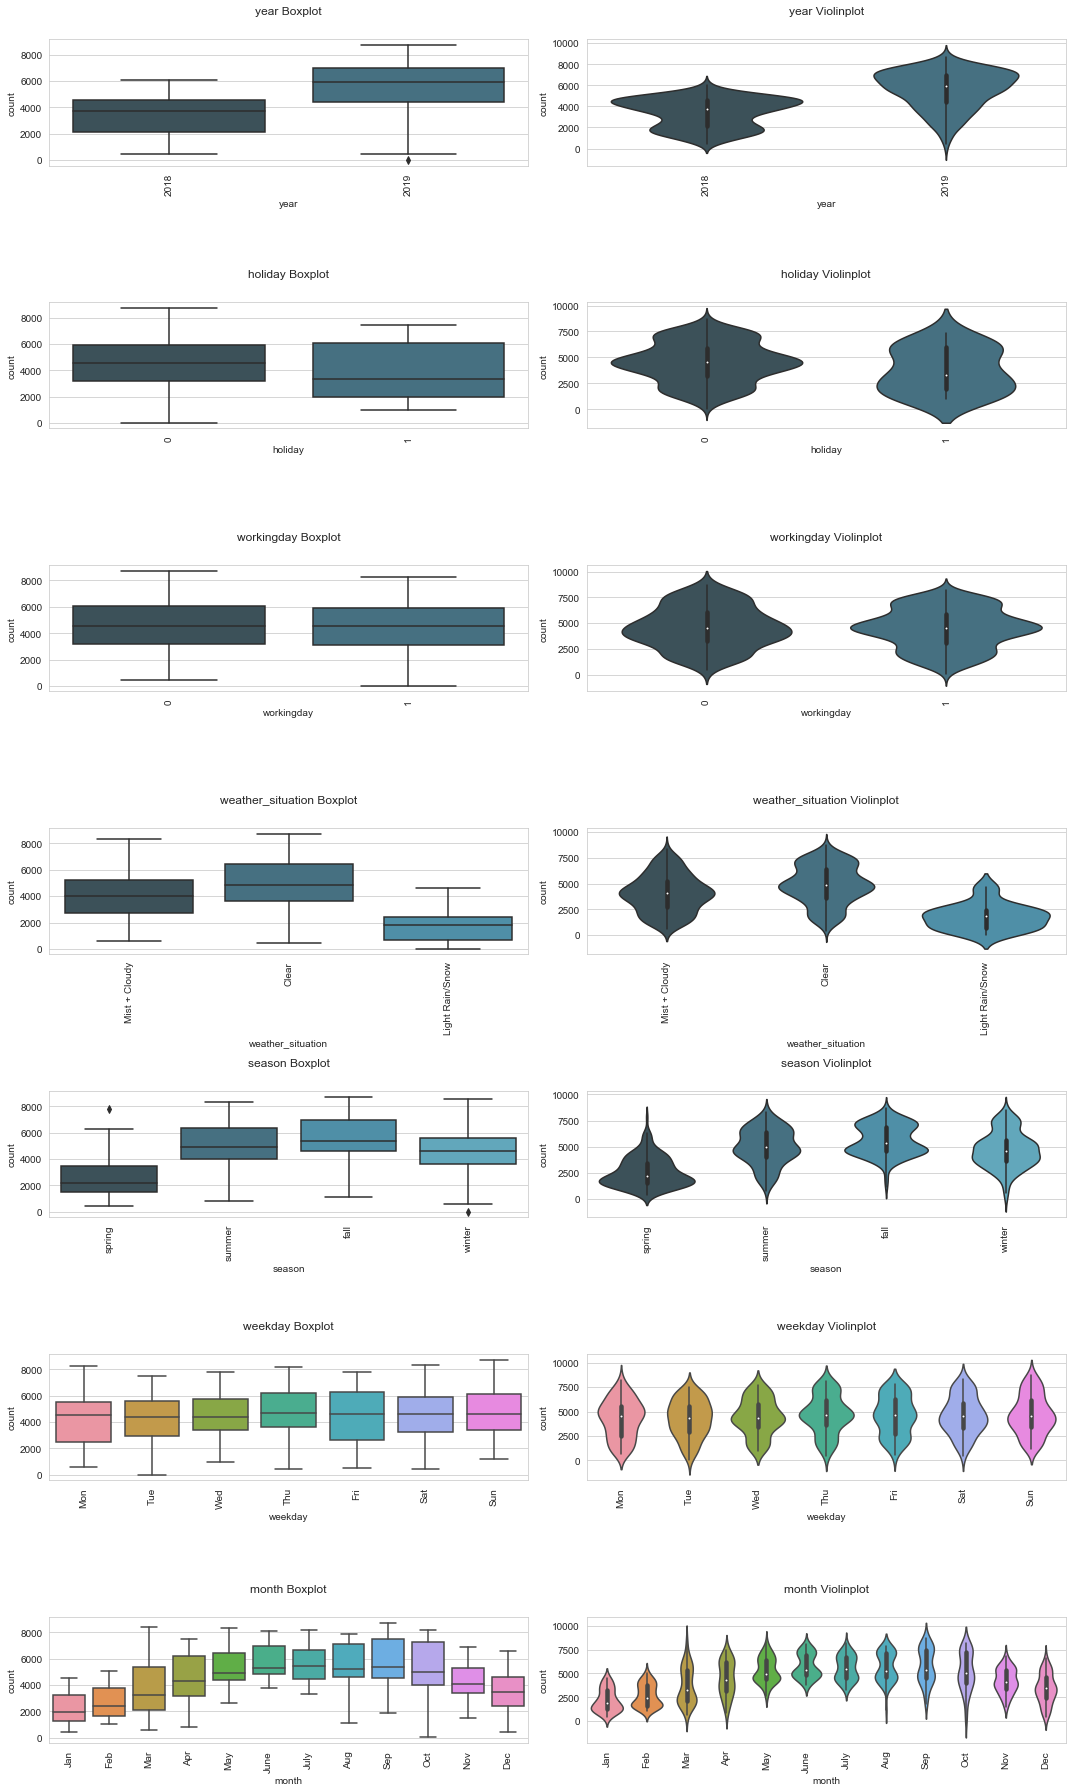

In [19]:
def cat_var(x,fig):
    plt.subplot(7,2,fig)
    plt.title(x +' '+ 'Boxplot')
    plt.xticks(rotation=90)
    sns.boxplot(x = x, y = 'count', data = boom_bike)
    plt.subplot(7,2,(fig+1))
    plt.title(x +' '+ 'Violinplot')
    plt.xticks(rotation=90)
    sns.violinplot(x = x, y = 'count', data = boom_bike)

plt.figure(figsize = (15,25))

plt.rcParams['axes.titlesize']= 12
plt.rcParams['axes.titleweight']= 10
plt.rcParams['axes.titlepad']= 25
plt.rcParams['axes.labelsize']= 10
plt.rcParams['xtick.labelsize']= 10
plt.rcParams['ytick.labelsize']= 10

cat_var('year', 1)
cat_var('holiday', 3)
cat_var('workingday', 5)
cat_var('weather_situation', 7)
cat_var('season', 9)
cat_var('weekday', 11)
cat_var('month', 13)

plt.tight_layout()
plt.show()

1. From first set of box and violin plots, we can see Y-o-Y increase in count of bikes
2. From second set of box and violin plots, we can see that bike rental was on the higher end on days which were marked as non-holidays. Also, the median count of bikes on non-holidays days was greater than median count of bikes on holidays.
3. From third set of box and violin plots, we can see that bike rental was on the higher end on days which were marked as non-working days. Also, the median count of bikes on non-workings days equals the median count of bikes on working days.
4. From fourth set of box and violin plots, we can see that bike rental was on the higher end on days which were marked as clear. Also, the median count of bikes on clear days were greater than any other weather situation.
5.  From fifth set of box and violin plots, we can see that bike rental was on the higher end on (Median count and 75th %tile) days in fall season.
6. From sixth set of box and violin plots, we can see that bike rental performed well on Thursdays, Fridays and Sundays.
7. From seventh set of box and violin plots, we can see that bike rental performed well in the month of May, June, July, August and reaching peak in month of September; slowly tapering off in the next three months. There is a slow uptake of bike rental in Jan and Feb; giving way to increased uptake in next three months. 

**Let's deep dive into variables:**

In [20]:
def count_var(x):
    plt.figure(figsize=(5,5))
    sns.barplot(x = x, y ='count', hue = 'year', data = boom_bike)
    plt.show()

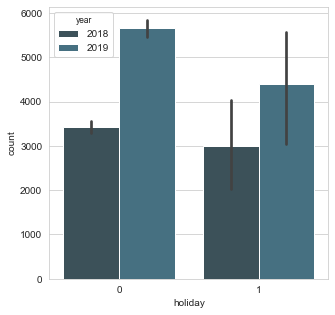

In [21]:
# Let's see count of cycles by holiday and by year 

count_var('holiday')

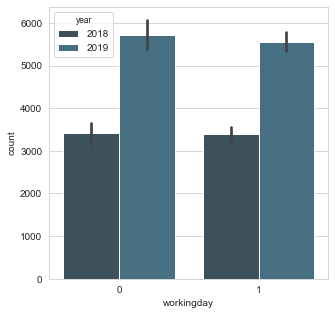

In [22]:
# Let's see count of cycles by holiday and by year 

count_var('workingday')

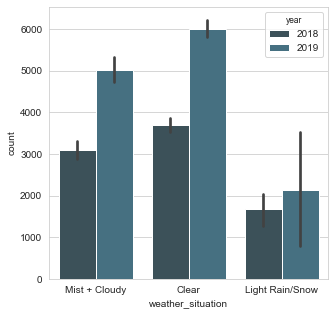

In [23]:
# Let's see count of cycles by weather_situation and by year 

count_var('weather_situation')

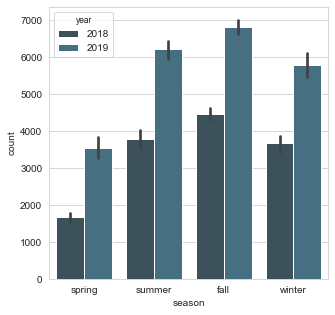

In [24]:
# Let's see count of cycles by season and by year 

count_var('season')

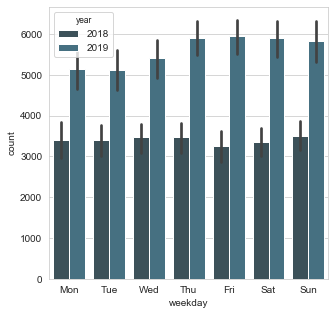

In [25]:
# Let's see count of cycles by weekday and by year 

count_var('weekday')

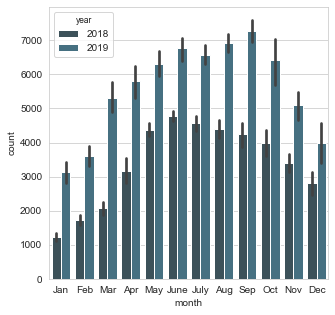

In [26]:
# Let's see count of cycles by weekday and by year 

count_var('month')

In [27]:
def scatter_plot(x):
    plt.figure(figsize=(10,5))
    sns.scatterplot(x = x, y ='count', hue = 'year', data = boom_bike)
    plt.show()

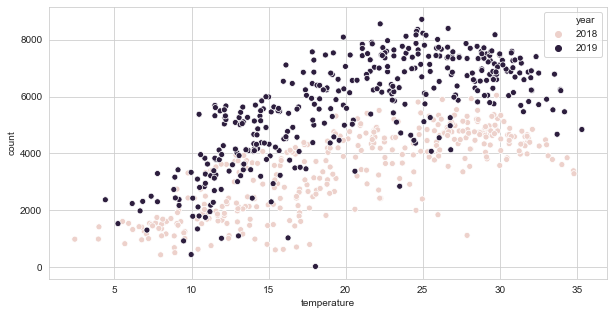

In [28]:
# Let's see distribution of count of cycles by temperature and by year

scatter_plot('temperature')

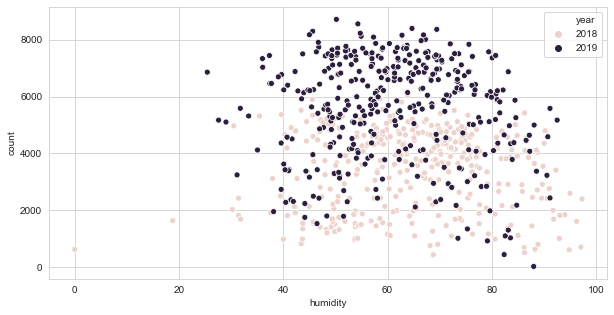

In [29]:
# Let's see distribution of count of cycles by humidity and by year

scatter_plot('humidity')

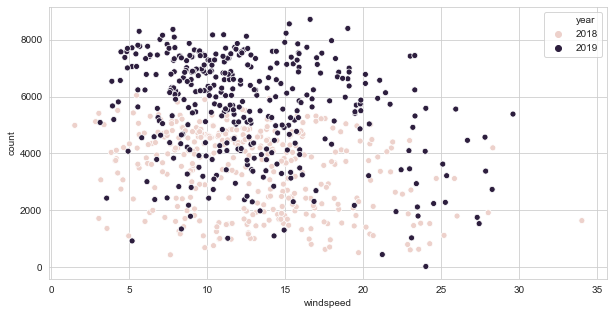

In [30]:
# Let's see distribution of count of cycles by humidity and by year

scatter_plot('windspeed')

**Let's get a sense of correlation between the numerical variables:**

In [31]:
boom_bike.columns

Index(['instant', 'date', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weather_situation', 'temperature', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

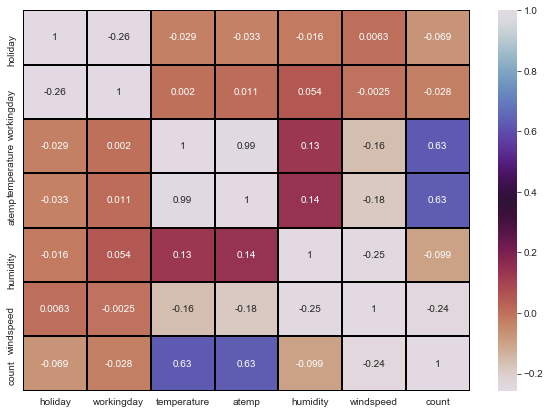

In [32]:
# Heatmap

num_var = ['holiday', 'workingday', 'temperature', 'atemp', 'humidity', 'windspeed', 'count']

plt.figure(figsize = (10,7))
sns.heatmap(boom_bike[num_var].corr(), annot = True, linewidths = 1, linecolor = 'black', cmap = 'twilight_r')
plt.show()

**From the above matrix, Temp and Atemp is positively correlated with Count whereas Holiday, workinday, humidity and windspeed are negatively correlated.**

### Data Preparation for Model Building

In [33]:
# We would not require these variabes:

boom_bike.drop(['instant', 'date', 'atemp', 'casual', 'registered'], axis = 1, inplace = True)

In [34]:
boom_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season             730 non-null    object 
 1   year               730 non-null    object 
 2   month              730 non-null    object 
 3   holiday            730 non-null    int64  
 4   weekday            730 non-null    object 
 5   workingday         730 non-null    int64  
 6   weather_situation  730 non-null    object 
 7   temperature        730 non-null    float64
 8   humidity           730 non-null    float64
 9   windspeed          730 non-null    float64
 10  count              730 non-null    int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 62.9+ KB


In [35]:
# Let's get dummy variables for all our categorical variables

def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis =1, inplace = True)
    return df

# Applying the function to boom_bike:

boom_bike = dummies('season', boom_bike)
boom_bike = dummies('year', boom_bike)
boom_bike = dummies('month', boom_bike)
boom_bike = dummies('weekday', boom_bike)
boom_bike = dummies('weather_situation', boom_bike)

In [36]:
boom_bike.head()

,holiday,workingday,temperature,humidity,windspeed,count,spring,summer,winter,2019,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Rain/Snow,Mist + Cloudy
0,0,1,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
boom_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   holiday          730 non-null    int64  
 1   workingday       730 non-null    int64  
 2   temperature      730 non-null    float64
 3   humidity         730 non-null    float64
 4   windspeed        730 non-null    float64
 5   count            730 non-null    int64  
 6   spring           730 non-null    uint8  
 7   summer           730 non-null    uint8  
 8   winter           730 non-null    uint8  
 9   2019             730 non-null    uint8  
 10  Aug              730 non-null    uint8  
 11  Dec              730 non-null    uint8  
 12  Feb              730 non-null    uint8  
 13  Jan              730 non-null    uint8  
 14  July             730 non-null    uint8  
 15  June             730 non-null    uint8  
 16  Mar              730 non-null    uint8  
 17  May             

### Train-Test Split and feature scaling

In [38]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(boom_bike, train_size = 0.7, test_size = 0.3, random_state =100)

In [39]:
df_train.shape

(510, 29)

In [40]:
df_test.shape

(219, 29)

In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['temperature', 'humidity', 'windspeed', 'count']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [42]:
df_train.head()

,holiday,workingday,temperature,humidity,windspeed,count,spring,summer,winter,2019,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Rain/Snow,Mist + Cloudy
653,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
576,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
728,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [43]:
df_train.describe()

,holiday,workingday,temperature,humidity,windspeed,count,spring,summer,winter,2019,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Rain/Snow,Mist + Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.711765,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.507843,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.157763,0.453386,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.500429,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


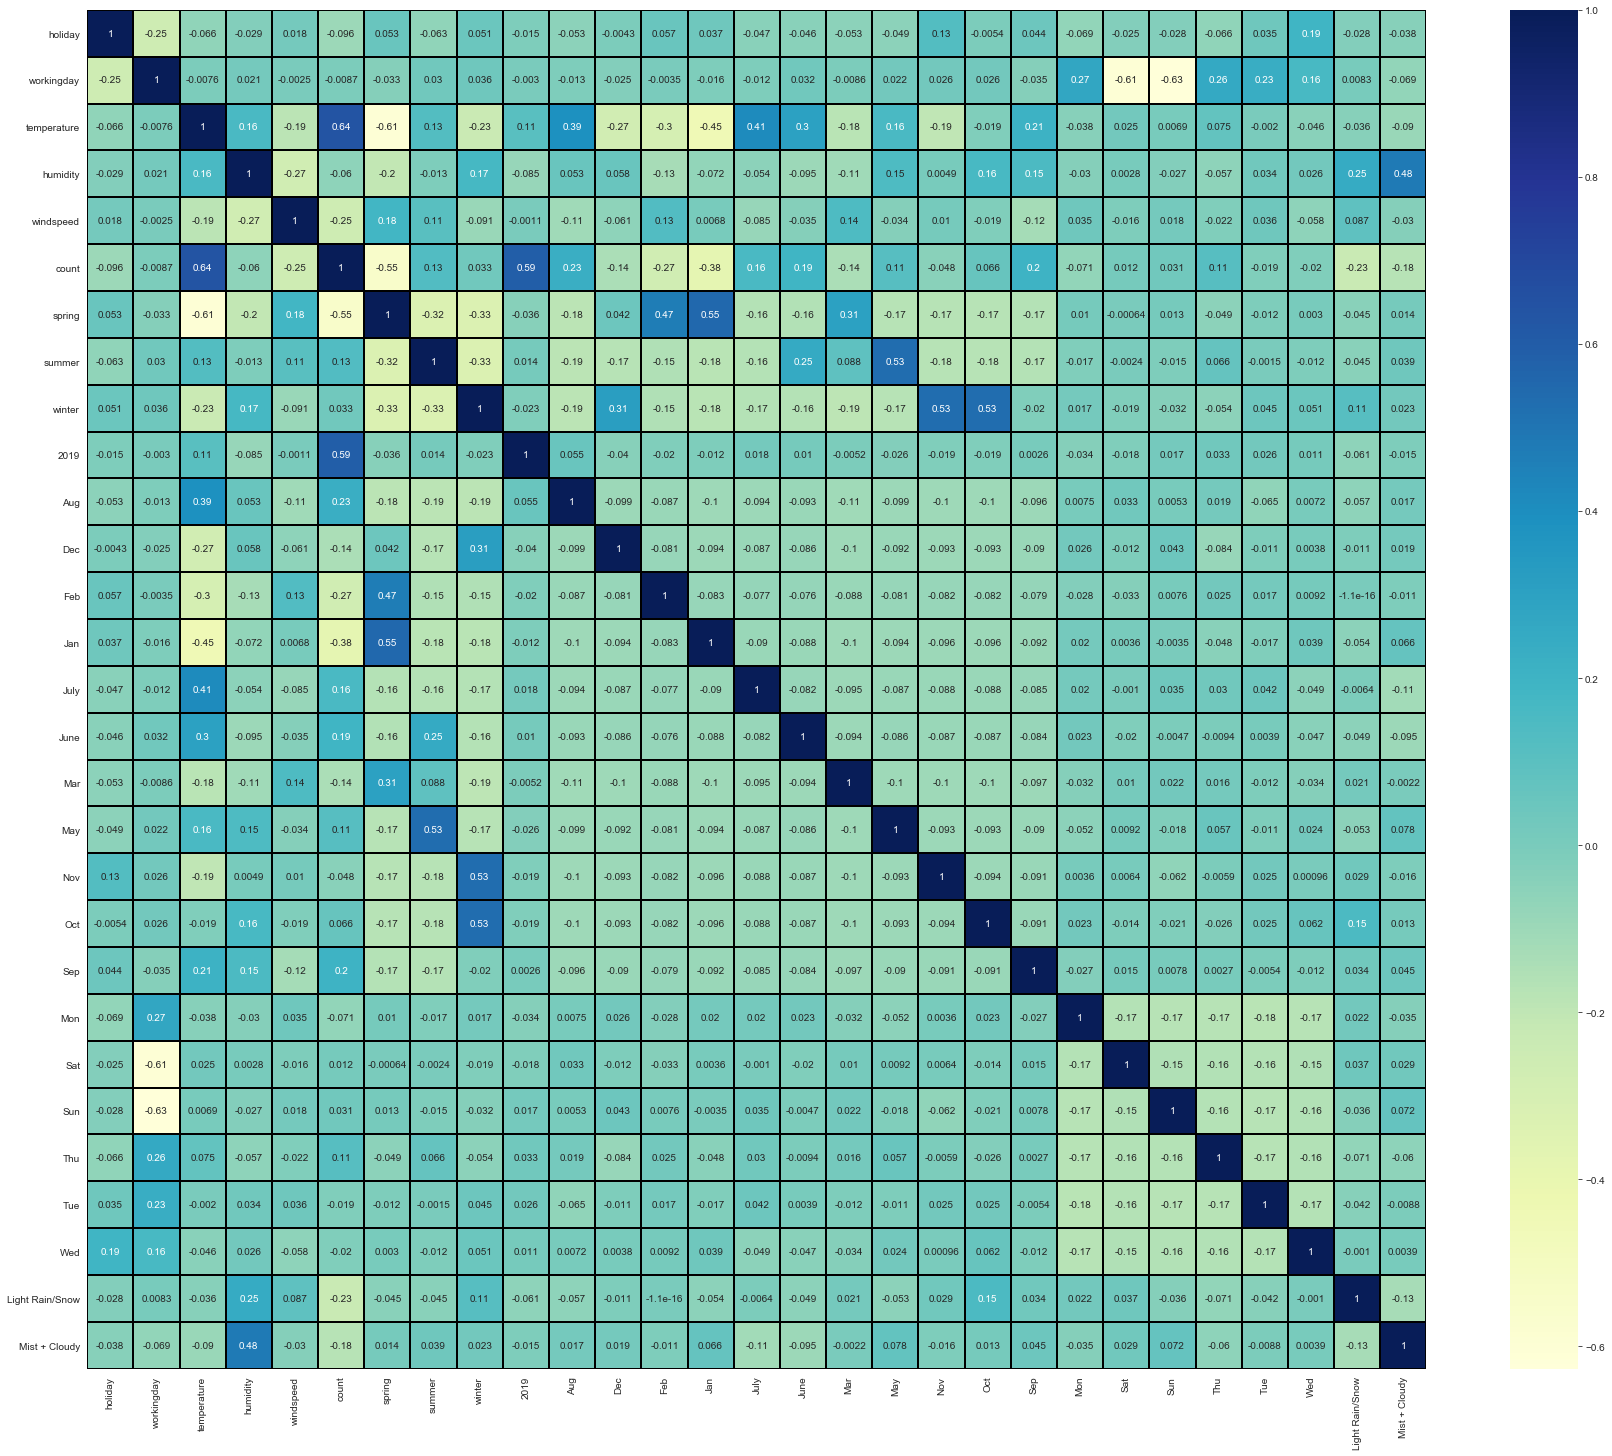

In [44]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu", linewidths = 1, linecolor = 'black')
plt.show()

In [45]:
#Dividing data into X and y variables

y_train = df_train.pop('count')
X_train = df_train

### Model Building 

In [46]:
# Importing necessary libraries

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [48]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('holiday', True, 1),
 ('workingday', False, 3),
 ('temperature', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('2019', True, 1),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', True, 1),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thu', False, 12),
 ('Tue', False, 7),
 ('Wed', False, 10),
 ('Light Rain/Snow', True, 1),
 ('Mist + Cloudy', True, 1)]

In [49]:
X_train.columns[rfe.support_]

Index(['holiday', 'temperature', 'humidity', 'windspeed', 'spring', 'summer',
       'winter', '2019', 'Dec', 'Jan', 'July', 'Nov', 'Sep', 'Light Rain/Snow',
       'Mist + Cloudy'],
      dtype='object')

In [50]:
# Building model using statsmodel, for the detailed statistics

X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,holiday,temperature,humidity,windspeed,spring,summer,winter,2019,Dec,Jan,July,Nov,Sep,Light Rain/Snow,Mist + Cloudy
653,0,0.509887,0.575354,0.300794,0,0,1,1,0,0,0,0,0,0,0
576,0,0.815169,0.725633,0.264686,0,0,0,1,0,0,1,0,0,0,0
426,0,0.442393,0.640189,0.255342,1,0,0,1,0,0,0,0,0,0,1
728,0,0.245101,0.498067,0.663106,1,0,0,1,1,0,0,0,0,0,0
482,0,0.395666,0.504508,0.188475,0,1,0,1,0,0,0,0,0,0,1


In [51]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    X = X.drop(['const'], axis = 1)
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

### MODEL 1

In [52]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Sun, 25 Oct 2020   Prob (F-statistic):          3.34e-189
Time:                        14:06:48   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3202      0.036     

In [53]:
#Calculating the Variance Inflation Factor

checkVIF(X_train_new)

,Features,VIF
2,humidity,30.94
1,temperature,17.80
3,windspeed,4.72
4,spring,4.37
6,winter,4.06
5,summer,2.81
14,Mist + Cloudy,2.32
7,2019,2.09
11,Nov,1.83
9,Jan,1.75


`Dec` is insignificant owing to its p-value, hence dropping it

In [54]:
X_train_new = X_train_rfe.drop(["Dec"], axis = 1)

### MODEL 2

In [55]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.4
Date:                Sun, 25 Oct 2020   Prob (F-statistic):          2.25e-189
Time:                        14:06:48   Log-Likelihood:                 512.39
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     495   BIC:                            -931.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3030      0.035     

In [56]:
#Calculating the Variance Inflation Factor

checkVIF(X_train_new)

,Features,VIF
2,humidity,29.12
1,temperature,16.80
3,windspeed,4.71
4,spring,4.37
6,winter,3.78
5,summer,2.79
13,Mist + Cloudy,2.29
7,2019,2.09
8,Jan,1.67
9,July,1.59


`Jan` is insignificant in presence of other variables due to high p-value; can be dropped

In [57]:
X_train_new = X_train_new.drop(["Jan"], axis = 1)

### MODEL 3

In [58]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Sun, 25 Oct 2020   Prob (F-statistic):          9.74e-190
Time:                        14:06:48   Log-Likelihood:                 510.48
No. Observations:                 510   AIC:                            -993.0
Df Residuals:                     496   BIC:                            -933.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2909      0.035     

In [59]:
#Calculating the Variance Inflation Factor

checkVIF(X_train_new)

,Features,VIF
2,humidity,28.13
1,temperature,16.11
3,windspeed,4.71
4,spring,4.04
6,winter,3.75
5,summer,2.78
12,Mist + Cloudy,2.29
7,2019,2.08
9,Nov,1.59
8,July,1.58


`humidity` can be dropped owing to high VIF value

In [60]:
X_train_new = X_train_new.drop(["humidity"], axis = 1)

### MODEL 4

In [61]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.5
Date:                Sun, 25 Oct 2020   Prob (F-statistic):          1.76e-186
Time:                        14:06:48   Log-Likelihood:                 499.95
No. Observations:                 510   AIC:                            -973.9
Df Residuals:                     497   BIC:                            -918.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2049      0.030     

In [62]:
#Calculating the Variance Inflation Factor

checkVIF(X_train_new)

,Features,VIF
1,temperature,5.11
2,windspeed,4.65
5,winter,2.28
4,summer,2.22
3,spring,2.09
6,2019,2.07
8,Nov,1.59
7,July,1.58
11,Mist + Cloudy,1.55
9,Sep,1.35


`Nov` can be dropped owing to high P value

In [63]:
X_train_new = X_train_new.drop(["Nov"], axis = 1)

### MODEL 5

In [64]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Sun, 25 Oct 2020   Prob (F-statistic):          2.40e-187
Time:                        14:06:48   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1996      0.030     

In [65]:
#Calculating the Variance Inflation Factor

checkVIF(X_train_new)

,Features,VIF
1,temperature,5.09
2,windspeed,4.60
4,summer,2.21
3,spring,2.08
6,2019,2.07
5,winter,1.79
7,July,1.58
10,Mist + Cloudy,1.55
8,Sep,1.34
9,Light Rain/Snow,1.08


`windspeed` can be dropped owing to negative correlation and high VIF

In [66]:
X_train_new = X_train_new.drop(["windspeed"], axis = 1)

### MODEL 6

In [67]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.1
Date:                Sun, 25 Oct 2020   Prob (F-statistic):          2.80e-181
Time:                        14:06:48   Log-Likelihood:                 481.98
No. Observations:                 510   AIC:                            -942.0
Df Residuals:                     499   BIC:                            -895.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1503      0.029     

In [68]:
#Calculating the Variance Inflation Factor

checkVIF(X_train_new)

,Features,VIF
1,temperature,4.22
5,2019,2.06
3,summer,1.93
4,winter,1.58
6,July,1.58
9,Mist + Cloudy,1.55
2,spring,1.40
7,Sep,1.34
8,Light Rain/Snow,1.07
0,holiday,1.04


`summer` can be dropped owing to p-value

In [69]:
X_train_new = X_train_new.drop(["summer"], axis = 1)

### MODEL 7

In [70]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.5
Date:                Sun, 25 Oct 2020   Prob (F-statistic):          2.16e-181
Time:                        14:06:49   Log-Likelihood:                 479.38
No. Observations:                 510   AIC:                            -938.8
Df Residuals:                     500   BIC:                            -896.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1938      0.022     

In [71]:
#Calculating the Variance Inflation Factor

checkVIF(X_train_new)

,Features,VIF
1,temperature,2.99
4,2019,2.05
8,Mist + Cloudy,1.51
3,winter,1.33
5,July,1.33
2,spring,1.25
6,Sep,1.19
7,Light Rain/Snow,1.06
0,holiday,1.04


1. All the p-values are 0
2. All the VIF values are less than 5.

**We can now proceed with residual analysis.**

### Residual Analysis of Model

In [72]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_pred = lm.predict(X_train_new)

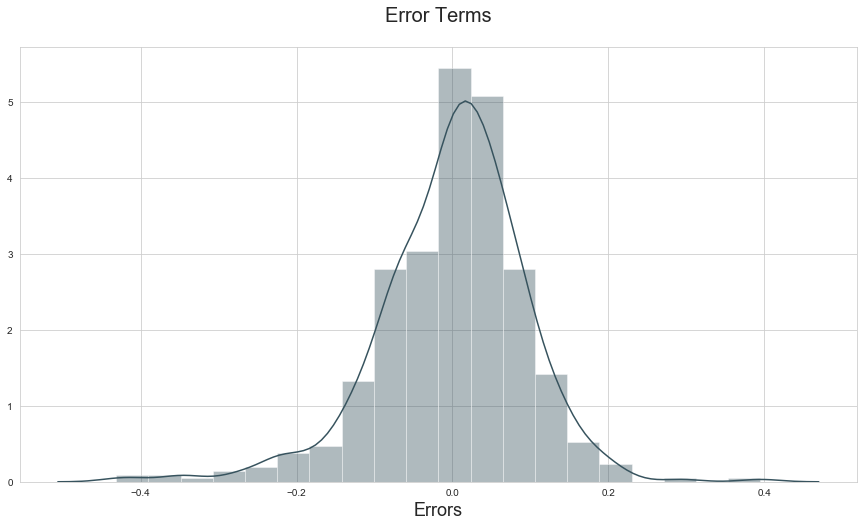

In [73]:
# Plot the histogram of the error terms

plt.figure(figsize=(15,8))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 
plt.show()

**From the above graph, we can see that error terms are distributed normally which confirms our model.**

### Prediction and Evaluation

In [74]:
num_vars = ['temperature', 'humidity', 'windspeed', 'count']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [75]:
#Dividing into X and y

y_test = df_test.pop('count')
X_test = df_test

In [76]:
# Now let's use our model to make predictions.

X_train_new = X_train_new.drop('const', axis = 1)
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [77]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [78]:
# Let's put all the coefficients in a table for easy reference:

param = pd.DataFrame(lm.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,10))
param.set_index('index',inplace = True)
param

,Variables,Coefficient value
index,,
0,const,0.193838
1,holiday,-0.101113
2,temperature,0.471172
3,spring,-0.110708
4,winter,0.055785
5,2019,0.233037
6,July,-0.068771
7,Sep,0.065793
8,Light Rain/Snow,-0.300245


In [79]:
# Evaluation of test via comparison of y_pred and y_test

from sklearn.metrics import r2_score 
rsq_test = round(r2_score(y_test, y_pred),3)
rsq_test

0.809

In [80]:
# Let's find ut Adjusted R^2 value:

# n is number of rows in X

n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1

p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

rsq_adj_test = round(1-(1-rsq_test)*(n-1)/(n-p-1),3)
rsq_adj_test

0.781

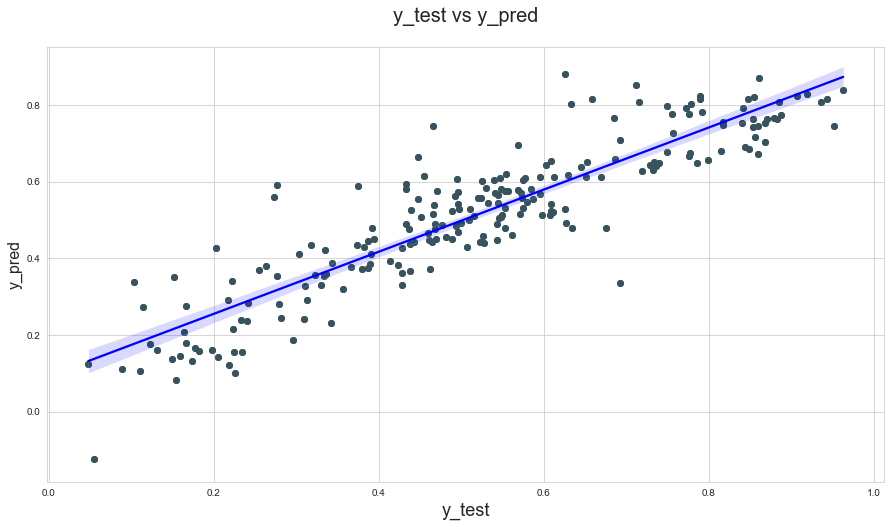

In [81]:
# Plotting y_test and y_pred to understand the spread

plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred)
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "blue"})
plt.title('y_test vs y_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)                          

plt.show()

In [82]:
from sklearn import metrics

In [83]:
print('MAE', metrics.mean_absolute_error(y_test, y_pred))
print('MSE', metrics.mean_squared_error(y_test, y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE 0.07160301991749918
MSE 0.009061246323057638
RMSE 0.09519057896166846


**Low value of RMSE (<0.5) suggests good ability of the model to predict. In our case, it stands at 0.095**

In [84]:
# Comparing R Square and Adjusted R square from the final train and test datset

print("rsq_train         :", 0.823)
print("rsq_adj_train     :", 0.819)
print("rsq_test          :", rsq_test)
print("rsq_adj_test      :", rsq_adj_test)

rsq_train         : 0.823
rsq_adj_train     : 0.819
rsq_test          : 0.809
rsq_adj_test      : 0.781


### Conclusion

There is a very small dip in the adjusted R^2 value from training set to test set which signifies that we indeed have arrived at a best possible model which explains 78.1% of variance in the test dataset. 

Equation of the Final Model:

y = 0.193 - 0.101(holiday) + 0.471(temperature) - 0.110(spring) + 0.055(winter) + 0.233(2019) - 0.068(July) + 0.065(Sep) - 0.300(Light Rain/Snow) - 0.079(Mist + Cloudy)

### Business Interpretation

1. Business needs to capitalise on variables with a positive coefficient such as temperature, winter, and September. CLearly, a higher temperature is good for business, hence need to make sure availibility of bikes is ensured. Also, amongst months, September is the most promising month.

2. Business needs to minimise losses owing to variables with a negative co-efficient such as holiday, spring, month of July, and when there is light rain/snow or if the weather is Misty + Cloudy. Specific marketing content/offers can be developled to minimise losses when business slows down during these periods.

3. Given that year 2019 has a positive slope, the business should have a positive outlook since as per the model, buisness would prosper as more years go by. Also, biking could be a great way to promote intra-city travel since people might avoid public transportation and hence a new model can be promoted where people can be urged to subscribe bikes on a monthly basis where they get to retain their bike for a month which could be re-santised upon return and new bike would be given out next month. This would ensure that business has steady cash flow on a month-on-month basis.